In [14]:
import ezdxf

import numpy as np
import sympy as smp
import pandas as pd

import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.integrate import tplquad

from civilpy.structural.steel import W, steel_tables

# Analytical Method

Area moment of inertia can be calculated using geometric properties of the shape. For instance, given the I beam shape, `W44X335`

In [15]:
w44x335 = W("W44X335")

In [16]:
w44x335.I_x

31100.0 <Unit('inch ** 4')>

In [18]:
file_name = r"C:\Users\dane.parks\PycharmProjects\civilpy\Training\res\W44X335.dxf"

doc = ezdxf.readfile(file_name)

In [19]:
doc.

Text(0.5, 1.0, 'Side of Spinning Top in Cylindrical Coordinates')

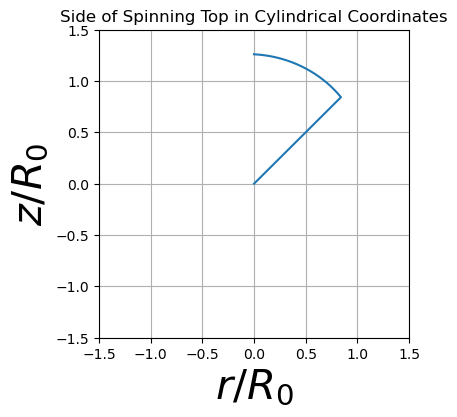

In [4]:
plt.figure(figsize=(4, 4))
plt.plot(np.insert(A * np.cos(t), 0, 0), np.insert(A * np.sin(t), 0, 0))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.ylabel("$z/R_0$", fontsize=30)
plt.xlabel("$r/R_0$", fontsize=30)
plt.title("Side of Spinning Top in Cylindrical Coordinates")

The kinetic energy of the spinning top (with its tip fixed on the plane is given by

$$ 
T = \frac{1}{2}\omega^TI\omega = \frac{1}{2}[\omega_x \omega_y \omega_z] 
\begin{bmatrix}     
    I_x & I_xy & I_xz^2 \\
    1 & y & y^2 \\
    1 & z & z^2     
\end{bmatrix}
\begin{bmatrix}
    \omega_x \\
    \omega_y \\
    \omega_z
\end{bmatrix}
$$

Note that this matrix is symmetric so there are 6 unique parameters. We will find $I_x$, $I_y$, and $I_z$ and show that all off diagonal terms (such as $I_{xy}$) are 0. Furthermore, since moment of intertias are typically given by  

$$ I = ... MR_0^2 $$

for some characteristic length $R_0$ and mass $M$, we're also going to want to find the mass $M$